In [ ]:
!git clone https://github.com/karpathy/nanoGPT

Cloning into 'nanoGPT'...
remote: Enumerating objects: 686, done.
remote: Total 686 (delta 0), reused 0 (delta 0), pack-reused 686 (from 1)
Receiving objects: 100% (686/686), 954.03 KiB | 3.97 MiB/s, done.
Resolving deltas: 100% (387/387), done.


In [ ]:
cd nanoGPT

/content/nanoGPT/nanoGPT


In [ ]:
pip install torch numpy transformers datasets tiktoken wandb tqdm

  Using cached datasets-3.5.0-py3-none-any.whl.metadata (19 kB)
  Using cached tiktoken-0.9.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.7 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.4.5.8-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.2.1.3-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.5.147-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.6.1.9-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.3.1.170-py3-no

In [ ]:
!python data/shakespeare_char/prepare.py

length of dataset in characters: 1,115,394
all the unique characters: 
 !$&',-.3:;?ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz
vocab size: 65
train has 1,003,854 tokens
val has 111,540 tokens


-> Connect to GPU and Check:

In [ ]:
import torch
print(torch.cuda.is_available())
print(torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU found")

True
Tesla T4


In [ ]:
!python train.py config/train_shakespeare_char.py --dtype=float16

Overriding config with config/train_shakespeare_char.py:
# train a miniature character-level shakespeare model
# good for debugging and playing on macbooks and such

out_dir = 'out-shakespeare-char'
eval_interval = 250 # keep frequent because we'll overfit
eval_iters = 200
log_interval = 10 # don't print too too often

# we expect to overfit on this small dataset, so only save when val improves
always_save_checkpoint = False

wandb_log = False # override via command line if you like
wandb_project = 'shakespeare-char'
wandb_run_name = 'mini-gpt'

dataset = 'shakespeare_char'
gradient_accumulation_steps = 1
batch_size = 64
block_size = 256 # context of up to 256 previous characters

# baby GPT model :)
n_layer = 6
n_head = 6
n_embd = 384
dropout = 0.2

learning_rate = 1e-3 # with baby networks can afford to go a bit higher
max_iters = 5000
lr_decay_iters = 5000 # make equal to max_iters usually
min_lr = 1e-4 # learning_rate / 10 usually
beta2 = 0.99 # make a bit bigger because number of 

In [ ]:
!python sample.py --out_dir=out-shakespeare-char

Overriding: out_dir = out-shakespeare-char
number of parameters: 10.65M
Loading meta from data/shakespeare_char/meta.pkl...


ANGELO:
And come, my lord,
Who shall be your hands to my country's prayers?

DUKE VINCENTIO:
Now, enown to your noble majesty
Yourself from her to strew the beggars.

ISABELLA:
Your dreams are not like your ways!

ANGELO:
The tents you have stuff'd i' the years of men
But a sign of the law, to the laon,--
And the issue of the other sweet precials!--
As for the king thrust for the ground:
Ere I know the fight of death? and though as the hand,
As being as the hung courts of night-blood
And follow
---------------

Menenius, I must rest be true;
And I have seen and for weak threatens of their son,
To the dead of courts makes at mine.
There is not perjured his pardon; and to make him
To the place of the same shall be graced on the golden,
To the good of her eyes of her children to the crown:
And so love I may make the world's child,
To see it bring the hands of God's

-> Some training runs exceed 10 mins hence set the max_iters at 3000:

In [ ]:
!python train.py config/train_shakespeare_char.py --max_iters=3000 --n_layer=2 --n_head=5 --n_embd=320 --dtype=float16

Overriding config with config/train_shakespeare_char.py:
# train a miniature character-level shakespeare model
# good for debugging and playing on macbooks and such

out_dir = 'out-shakespeare-char'
eval_interval = 250 # keep frequent because we'll overfit
eval_iters = 200
log_interval = 10 # don't print too too often

# we expect to overfit on this small dataset, so only save when val improves
always_save_checkpoint = False

wandb_log = False # override via command line if you like
wandb_project = 'shakespeare-char'
wandb_run_name = 'mini-gpt'

dataset = 'shakespeare_char'
gradient_accumulation_steps = 1
batch_size = 64
block_size = 256 # context of up to 256 previous characters

# baby GPT model :)
n_layer = 6
n_head = 6
n_embd = 384
dropout = 0.2

learning_rate = 1e-3 # with baby networks can afford to go a bit higher
max_iters = 5000
lr_decay_iters = 5000 # make equal to max_iters usually
min_lr = 1e-4 # learning_rate / 10 usually
beta2 = 0.99 # make a bit bigger because number of 

In [ ]:
!python train.py config/train_shakespeare_char.py --max_iters=3000 --n_layer=3 --n_head=5 --n_embd=320 --dtype=float16

Overriding config with config/train_shakespeare_char.py:
# train a miniature character-level shakespeare model
# good for debugging and playing on macbooks and such

out_dir = 'out-shakespeare-char'
eval_interval = 250 # keep frequent because we'll overfit
eval_iters = 200
log_interval = 10 # don't print too too often

# we expect to overfit on this small dataset, so only save when val improves
always_save_checkpoint = False

wandb_log = False # override via command line if you like
wandb_project = 'shakespeare-char'
wandb_run_name = 'mini-gpt'

dataset = 'shakespeare_char'
gradient_accumulation_steps = 1
batch_size = 64
block_size = 256 # context of up to 256 previous characters

# baby GPT model :)
n_layer = 6
n_head = 6
n_embd = 384
dropout = 0.2

learning_rate = 1e-3 # with baby networks can afford to go a bit higher
max_iters = 5000
lr_decay_iters = 5000 # make equal to max_iters usually
min_lr = 1e-4 # learning_rate / 10 usually
beta2 = 0.99 # make a bit bigger because number of 

In [ ]:
!python train.py config/train_shakespeare_char.py --max_iters=3000 --n_layer=5 --n_head=5 --n_embd=320 --dtype=float16

Overriding config with config/train_shakespeare_char.py:
# train a miniature character-level shakespeare model
# good for debugging and playing on macbooks and such

out_dir = 'out-shakespeare-char'
eval_interval = 250 # keep frequent because we'll overfit
eval_iters = 200
log_interval = 10 # don't print too too often

# we expect to overfit on this small dataset, so only save when val improves
always_save_checkpoint = False

wandb_log = False # override via command line if you like
wandb_project = 'shakespeare-char'
wandb_run_name = 'mini-gpt'

dataset = 'shakespeare_char'
gradient_accumulation_steps = 1
batch_size = 64
block_size = 256 # context of up to 256 previous characters

# baby GPT model :)
n_layer = 6
n_head = 6
n_embd = 384
dropout = 0.2

learning_rate = 1e-3 # with baby networks can afford to go a bit higher
max_iters = 5000
lr_decay_iters = 5000 # make equal to max_iters usually
min_lr = 1e-4 # learning_rate / 10 usually
beta2 = 0.99 # make a bit bigger because number of 

In [ ]:
!python train.py config/train_shakespeare_char.py --max_iters=3000 --n_layer=7 --n_head=5 --n_embd=320 --dtype=float16

Overriding config with config/train_shakespeare_char.py:
# train a miniature character-level shakespeare model
# good for debugging and playing on macbooks and such

out_dir = 'out-shakespeare-char'
eval_interval = 250 # keep frequent because we'll overfit
eval_iters = 200
log_interval = 10 # don't print too too often

# we expect to overfit on this small dataset, so only save when val improves
always_save_checkpoint = False

wandb_log = False # override via command line if you like
wandb_project = 'shakespeare-char'
wandb_run_name = 'mini-gpt'

dataset = 'shakespeare_char'
gradient_accumulation_steps = 1
batch_size = 64
block_size = 256 # context of up to 256 previous characters

# baby GPT model :)
n_layer = 6
n_head = 6
n_embd = 384
dropout = 0.2

learning_rate = 1e-3 # with baby networks can afford to go a bit higher
max_iters = 5000
lr_decay_iters = 5000 # make equal to max_iters usually
min_lr = 1e-4 # learning_rate / 10 usually
beta2 = 0.99 # make a bit bigger because number of 

In [ ]:
import os

figures_dir = 'figures'

if not os.path.exists(figures_dir):
    os.makedirs(figures_dir)
    print(f"Folder '{figures_dir}' created!")
else:
    print(f"Folder '{figures_dir}' already exists.")


Folder 'figures' created!


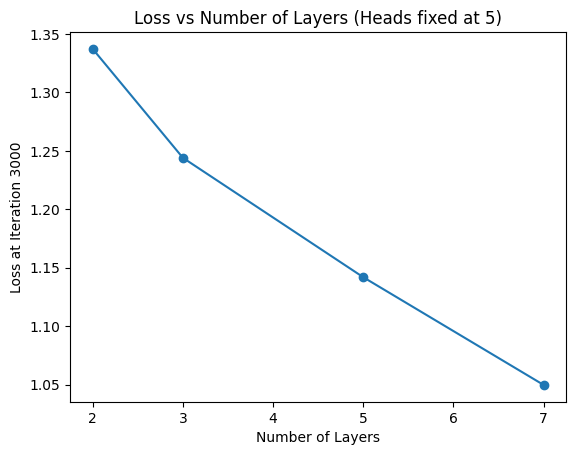

In [ ]:
import matplotlib.pyplot as plt

layers = [2, 3, 5, 7]
losses = [1.3373, 1.2441, 1.1419, 1.0497]

plt.plot(layers, losses, marker='o')
plt.xlabel('Number of Layers')
plt.ylabel('Loss at Iteration 3000')
plt.title('Loss vs Number of Layers (Heads fixed at 5)')
plt.savefig('figures/loss_vs_layers.png')
plt.show()


In [ ]:
cp -r data/shakespeare_char data/code_generation

In [ ]:
from datasets import load_dataset

# Load streaming dataset filtered for Python files
ds = load_dataset("codeparrot/github-code", split="train", streaming=True, languages=["Python"])

# Collect enough code snippets to reach at least 100,000 tokens (characters)
code_samples = []
token_count = 0
min_tokens = 100000

for sample in ds:
    code = sample["code"]
    code_samples.append(code)
    token_count += len(code)
    if token_count >= min_tokens:
        break

# Write to input.txt
with open("data/code_generation/input.txt", "w", encoding="utf-8") as f:
    f.write("\n\n".join(code_samples))


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/7.54k [00:00<?, ?B/s]

github-code.py:   0%|          | 0.00/7.23k [00:00<?, ?B/s]

The repository for codeparrot/github-code contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/codeparrot/github-code.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


In [ ]:
!python data/code_generation/prepare.py

length of dataset in characters: 106,762
all the unique characters: 	
 !"#$%&'()*+,-./0123456789:;<=>?@ABCDEFGHIJKLMNOPQRSTUVWXYZ[\]_`abcdefghijklmnopqrstuvwxyz{|}~–
vocab size: 97
train has 96,085 tokens
val has 10,677 tokens


In [ ]:
!python train.py config/train_code_generation.py --max_iters=3000 --n_layer=7 --n_head=5 --n_embd=320 --dtype=float16

Overriding config with config/train_code_generation.py:
# train a miniature character-level shakespeare model
# good for debugging and playing on macbooks and such

out_dir = 'out-code-generation'
eval_interval = 250 # keep frequent because we'll overfit
eval_iters = 200
log_interval = 10 # don't print too too often

# we expect to overfit on this small dataset, so only save when val improves
always_save_checkpoint = False

wandb_log = False # override via command line if you like
wandb_project = 'code-generation'
wandb_run_name = 'baby-gpt-code'

dataset = 'code_generation'
gradient_accumulation_steps = 1
batch_size = 64
block_size = 256 # context of up to 256 previous characters

# baby GPT model :)
n_layer = 6
n_head = 6
n_embd = 384
dropout = 0.2

learning_rate = 1e-3 # with baby networks can afford to go a bit higher
max_iters = 5000
lr_decay_iters = 5000 # make equal to max_iters usually
min_lr = 1e-4 # learning_rate / 10 usually
beta2 = 0.99 # make a bit bigger because number of

In [ ]:
!python sample.py --out_dir=out-code-generation

Overriding: out_dir = out-code-generation
number of parameters: 8.64M
Loading meta from data/code_generation/meta.pkl...

		json_loct(key, val);
					return NUL;
	}


	}


bol json_din_dict(struct JsonValue *dict, const char **dst_p, char *va_p, char *key, str c_p, char *)
{
	struct MBuct JsonValue *jv;
	if (!val)
		if (!== valal;
	return = 0;

	turn trrStralse(ctate = 0x->papate(ce, JstonVainte *valinte)
		if = (!== 0xES_A%)
	}
			->urete;
}
}

bure at(ifingh (s[0 JSTRICON_CT, statate, *de, T TR_CON_KE, struchal)
{
				c = = 0;
	retx->= mement_f, 0 kedey "In(ctrex, JSON_LON_DICLICT);
			return false;
	c = = JS_DIC
---------------

def = 0;
		if (!== 0 0 0 || epxE e == 0 v208 1;
			itf (bufal >= 40;
	if (!== 01
	if esigned = 0x20 ign cht c = 0;
		c && (undended 0xDICON_errre_BON_DF8) {
		il (*stx, '\\\n";
		c == sine '\ne ';
	sse ';
		case '(stx-'9');
	case = ';
				case ': '0'\'n': case '\ub'; ': easea': '[': '6':
									} easeak;
									}
		ifareacak;
					} '\ureaseace '1'< {
		